# Mundo 28

### Análise de dados

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

/home/vinicius/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
cotacoes = yf.download("^BVSP", "2021-08-31", "2022-08-31")['Close']

cotacoes = cotacoes.pct_change().dropna().to_frame()

cotacoes

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2021-09-01,0.005178
2021-09-02,-0.022773
2021-09-03,0.002194
2021-09-06,0.008005
2021-09-08,-0.037805
...,...
2022-08-24,0.000363
2022-08-25,0.005616
2022-08-26,-0.010860


In [3]:
cotacoes['ano'] = cotacoes.index.year
cotacoes['mes'] = cotacoes.index.month

In [4]:
cotacoes

,Close,ano,mes
Date,,,
2021-09-01,0.005178,2021,9
2021-09-02,-0.022773,2021,9
2021-09-03,0.002194,2021,9
2021-09-06,0.008005,2021,9
2021-09-08,-0.037805,2021,9
...,...,...,...
2022-08-24,0.000363,2022,8
2022-08-25,0.005616,2022,8
2022-08-26,-0.010860,2022,8


In [5]:
def estatisticas_ibov(agrupamento):
    
    return {'min': agrupamento.min() * 100, 'max': agrupamento.max() * 100, 
            'media': agrupamento.mean() * 100, 'vol': agrupamento.std() * np.sqrt(252)}

In [6]:
estatisticas_por_ano = cotacoes.groupby('ano')['Close'].apply(estatisticas_ibov)

estatisticas_por_ano

ano        
2021  min     -3.780468
      max      3.662615
      media   -0.141525
      vol      0.234431
2022  min     -2.900581
      max      2.776208
      media    0.038139
      vol      0.187151
Name: Close, dtype: float64

In [7]:
cotacoes = yf.download("WEGE3.SA", "2019-08-31", "2022-08-31")['Adj Close']

cotacoes

[*********************100%***********************]  1 of 1 completed


Date
2019-09-02    10.944188
2019-09-03    10.660735
2019-09-04    10.872123
2019-09-05    10.944188
2019-09-06    10.973014
                ...    
2022-08-24    28.706726
2022-08-25    28.866264
2022-08-26    28.726665
2022-08-29    28.287941
2022-08-30    28.307882
Name: Adj Close, Length: 744, dtype: float64

In [8]:
cotacoes_normalizadas = cotacoes.transform(lambda x: (x - x.mean())/x.std())

cotacoes_normalizadas

Date
2019-09-02   -2.083437
2019-09-03   -2.116473
2019-09-04   -2.091836
2019-09-05   -2.083437
2019-09-06   -2.080077
                ...   
2022-08-24   -0.013233
2022-08-25    0.005361
2022-08-26   -0.010909
2022-08-29   -0.062042
2022-08-30   -0.059718
Name: Adj Close, Length: 744, dtype: float64

In [9]:
cotacoes_normalizadas.describe()

count    7.440000e+02
mean     1.528049e-16
std      1.000000e+00
min     -2.116473e+00
25%     -7.789743e-01
50%      2.826066e-01
75%      7.337357e-01
max      1.860392e+00
Name: Adj Close, dtype: float64

In [10]:
cotacoes_maxdd = cotacoes.to_frame()
cotacoes_maxdd['ano'] = cotacoes_maxdd.index.year

cotacoes_maxdd['maxima_do_ano'] = cotacoes_maxdd.groupby('ano')['Adj Close'].cummax()

cotacoes_maxdd

,Adj Close,ano,maxima_do_ano
Date,,,
2019-09-02,10.944188,2019,10.944188
2019-09-03,10.660735,2019,10.944188
2019-09-04,10.872123,2019,10.944188
2019-09-05,10.944188,2019,10.944188
2019-09-06,10.973014,2019,10.973014
...,...,...,...
2022-08-24,28.706726,2022,35.040100
2022-08-25,28.866264,2022,35.040100
2022-08-26,28.726665,2022,35.040100


In [11]:
cotacoes_maxdd['quedas'] = cotacoes_maxdd['Adj Close']/cotacoes_maxdd['maxima_do_ano'] - 1

cotacoes_maxdd

,Adj Close,ano,maxima_do_ano,quedas
Date,,,,
2019-09-02,10.944188,2019,10.944188,0.000000
2019-09-03,10.660735,2019,10.944188,-0.025900
2019-09-04,10.872123,2019,10.944188,-0.006585
2019-09-05,10.944188,2019,10.944188,0.000000
2019-09-06,10.973014,2019,10.973014,0.000000
...,...,...,...,...
2022-08-24,28.706726,2022,35.040100,-0.180746
2022-08-25,28.866264,2022,35.040100,-0.176193
2022-08-26,28.726665,2022,35.040100,-0.180177


In [12]:
cotacoes_maxdd.groupby('ano')['quedas'].min()

ano
2019   -0.063595
2020   -0.466677
2021   -0.318399
2022   -0.354720
Name: quedas, dtype: float64

# Exercícios 
<BR>

* Exercício 88: Peça para que o usuário escolha uma ação da bolsa brasileira e analise o ativo entre as datas 01/01/2015 e 31/08/2022. Devolva as seguintes estatísticas pro usuário:

        - Retorno acumulado ano a ano contra o Ibovespa.
        - Estatísticas descritivas de volatilidade, média de retornos, maior retorno e menor retorno por ano.
        - Máximo Drawndown por ano.
        - Gráfico de correlação de 252 dias contra o Ibovespa. 
        - Volume financeiro médio anual negociado pela empresa. 
        

[*********************100%***********************]  2 of 2 completed
Retorno ano a ano
            retorno_YTD_PETR4.SA  retorno_YTD_ibov
Date                                              
2015-12-30            -28.418807        -10.640666
2016-12-29            121.940369         38.931949
2017-12-29              8.271682         26.856725
2018-12-28             46.955209         15.032329
2019-12-30             37.488826         31.946704
2020-12-30             -6.089787          2.881929
2021-12-30             23.510248        -12.140211
2022-08-30             70.660802          5.350976

Estatísticas descritivas: 
ano        
2015  min     -10.157787
      max      13.424361
      media    -0.067103
      vol       0.594490
2016  min     -10.675658
      max      16.283212
      media     0.400934
      vol       0.639914
2017  min     -15.759140
      max       5.729873
      media     0.056837
      vol       0.355274
2018  min     -14.857755
      max      14.133639
      media  

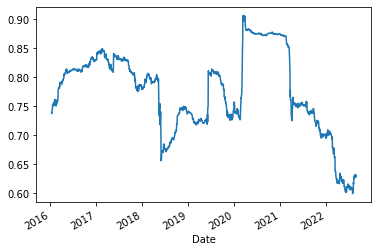

In [13]:
#gabarito 88

acao = input("Escolha uma ação para ser analisada: ").upper()

acao = acao + ".SA"

ativos = [acao, "^BVSP"]

dados_completos = yf.download(ativos, "2015-01-01", "2022-08-31")

cotacoes_ajustadas = dados_completos['Adj Close']

retornos = cotacoes_ajustadas.pct_change().dropna()

retornos['ano'] = retornos.index.year

#retorno acum por ano

retornos[f'{acao}'] = 1 + retornos[f'{acao}'] 
retornos['^BVSP'] = 1 + retornos['^BVSP']

retornos[f'retorno_YTD_{acao}'] = retornos.groupby('ano')[f'{acao}'].cumprod() - 1 
retornos[f'retorno_YTD_ibov'] = retornos.groupby('ano')['^BVSP'].cumprod() - 1 

retorno_por_ano = retornos.groupby('ano').tail(1)[[f'retorno_YTD_{acao}', 'retorno_YTD_ibov']]

print("Retorno ano a ano")
print(retorno_por_ano * 100)
print()

#Estat descritivas da empresa

retornos = cotacoes_ajustadas[f'{acao}'].pct_change().dropna()

retornos = retornos.to_frame()

retornos['ano'] = retornos.index.year

def estatisticas(agrupamento):
    
    return {'min': agrupamento.min() * 100, 'max': agrupamento.max() * 100, 
            'media': agrupamento.mean() * 100, 'vol': agrupamento.std() * np.sqrt(252)}

descritivas = retornos.groupby('ano')[f'{acao}'].apply(estatisticas)

print("Estatísticas descritivas: ")
print(descritivas)
print()

#maxDD

cotacoes_empresa = cotacoes_ajustadas[f'{acao}']

cotacoes_empresa = cotacoes_empresa.to_frame()

cotacoes_empresa['ano'] = cotacoes_empresa.index.year

cotacoes_empresa['maxima_do_ano'] = cotacoes_empresa.groupby('ano')[f'{acao}'].cummax()
cotacoes_empresa['quedas'] = cotacoes_empresa[f'{acao}']/cotacoes_empresa['maxima_do_ano'] - 1

print("Max DD: ")
print(cotacoes_empresa.groupby('ano')['quedas'].min())
print()

#grafico de cor contra o ibov

retornos = cotacoes_ajustadas.pct_change().dropna()

retornos[f'{acao}'].rolling(252).corr(retornos['^BVSP']).dropna().plot()

#volume medio anual

volume_acoes = dados_completos['Volume'][f'{acao}']
cotacao =  dados_completos['Close'][f'{acao}']

volume_financeiro = volume_acoes * cotacao

volume_financeiro = volume_financeiro.to_frame()

volume_financeiro['ano'] = volume_financeiro.index.year

volume_medio = volume_financeiro.groupby('ano').mean()

volume_medio = volume_medio.astype(int)

print("Volume negociado: ")
print(volume_medio)
print()

# Galáxia 5

Agora que aprendemos a analisar nossos dados, que tal fazer uns gráficos legais pra visualizar nossos resultados?